# **Welcome 👋**

Hello Kagglers!

In this notebook, you will find a complete guide with the various steps that should be taken to handling your data. My name is  *Mustafa FarajAllah*  and I will be your mentor in this notebook!

## **What we are going to do?**
- Exploratory Data Analysis: This step is necessary to understand the data you are working with.
- Preprocessing: In this step, we are going to take action on the insights found in the Exploratory Data Analysis step.
- Modeling: Here, we are going to build many different models to predict the target class.

Please note that you will find comments in every cell documenting the code. If you faced any issue, please feel free to write your own comment on this notebook, I will be pleased to guide you!

# **Introduction 🚀**

Breast cancer is the most commen type of cancerous diseases. This disease is very commen with women, and rarly diagnosed with men.

# **Necessary Importations 📦**

The coming libraries and classes are essential to proceed with the notebook!

In [1]:
#installing pandas_dq

!pip -q install pandas_dq

**`pandas_dq`** is a library that can simplify alot of the code. It has many different features implemented in it. Later in this notebook I am going to show the important functionalies in it. If you want more details regarding this library, please click the following [link](https://pypi.org/project/pandas-dq/1.5/#introduction).

In [2]:
#remove warnings
import warnings

#data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#code simplification. `dq_report` is a class
from pandas_dq import dq_report

#data scaling
from sklearn.preprocessing import StandardScaler

#necessary for the models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#evaluation tools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#data splitting, and gridsearch
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

#feature engineering tool
from itertools import combinations

#feature importance
from sklearn.decomposition import PCA

## **1. Options**

In [3]:
#this will allow us to view all the columns. you can replace `None`
#with the number in your mind, but None is a general good practice
pd.set_option('display.max_columns', None)

#removes warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# **Exploratory Data Analysis 🔍**

## **1. Reading the data**

In [4]:
#reading the dataset
df = pd.read_csv('/kaggle/input/breast-cancer/breast-cancer.csv')

#overview of the first 4 records (rows)
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [5]:
#what is the shape of our data?

print('Number of records:', df.shape[0],
      '\nNumber of columns:', df.shape[1])

Number of records: 569 
Number of columns: 32


Comment: We can clearly see that we have ALOT of columns, but small amount of records.
What can we learn from such information?
- We have to go from simple model. The best models for small data are tree-based models.
- We have to use cross-validation methods. Such as stratified kfold, to optain the best results.

Additionally, the column **`diagnosis`** will be our target. Were **M** represent **Malignant** which is one of the cancer types, and **B** represent **Benign** which is a non-cancerous tumer.

## **2. Is the target balanced?**

the term *balance* is important. The target feature must be balanced to ensure that our model is training with no bias towards any class under the target.

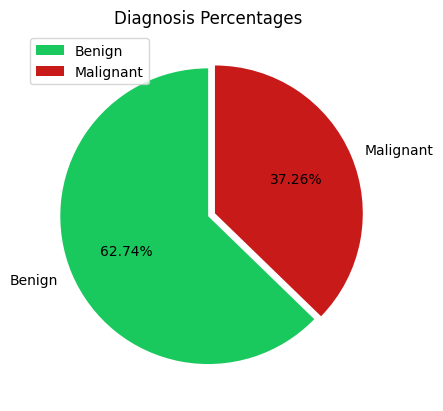

In [6]:
#.value_counts() is a function that counts the classes under a certain feature
#the parameter normalize=True compined with multiply of 100 will give the percentage
classes_count = df['diagnosis'].value_counts(normalize=True) * 100

#make the output more presentable by renaming the index
classes_count = classes_count.rename(index={'B': 'Benign', 'M': 'Malignant'})

#plotting (pie chart)
plt.pie(classes_count, labels=classes_count.index, autopct='%1.2f%%',
        startangle=90, colors=['#1ac95d', '#c91a1a'], explode=(0, 0.05))

plt.title('Diagnosis Percentages')
plt.legend()
plt.show()

Comment: We can clearly see that we are dealing with an imbalanced dataset. Its crucial to note that most real-world data are imbalanced and its very rare to see a balanced data set.

## **3. Data insights using pandas_dq**

dq_report() will simplify alot of the coding. What it will give?
- Smallest and biggest value under every feature.
- The data type.
- Missing values percentage.
- Outliers boundaries.

In [7]:
#creating the summary report
Suggestions = dq_report(df)

Suggestions

This is a summary report. Change verbose to 1 to see more details on each DQ issue.
    All variables classified into correct types.


,DQ Issue
The Good News,"There are no duplicate rows in this dataset, There are no duplicate columns in this datatset, There are no zero-variance or low information columns in the dataset., There are no date-time vars in this dataset, There are no columns with missing values in the dataset, There are no categorical columns with rare categories (< 1 percent) in this dataset, There are no columns with infinite values in this dataset , There are no columns with mixed (more than one) dataypes in this dataset, There are no high cardinality columns in this dataset, There is no target given. Hence no target leakage columns detected in the dataset"
The Bad News,"There are ID columns in the dataset. Remove them before modeling using Fix_DQ., There are 30 numerical columns, some with outliers. Remove them or use robust statistics., There are 17 columns with >= 0.8 correlation in the dataset. Drop one of them or use dimensionality reduction techniques."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.0,100,8670.0,911320502.0,Possible ID column: drop before modeling step.
diagnosis,object,0.0,0,,,No issue
radius_mean,float64,0.0,NA,6.981,28.11,Column has 14 outliers greater than upper bound (21.90) or lower than lower bound(5.58). Cap them or remove them.
texture_mean,float64,0.0,NA,9.71,39.28,Column has 7 outliers greater than upper bound (30.24) or lower than lower bound(7.73). Cap them or remove them.
perimeter_mean,float64,0.0,NA,43.79,188.5,"Column has 13 outliers greater than upper bound (147.49) or lower than lower bound(31.78). Cap them or remove them., Column has a high correlation with ['radius_mean']. Consider dropping one of them."
area_mean,float64,0.0,NA,143.5,2501.0,"Column has 25 outliers greater than upper bound (1326.30) or lower than lower bound(-123.30). Cap them or remove them., Column has a high correlation with ['radius_mean', 'perimeter_mean']. Consider dropping one of them."
smoothness_mean,float64,0.0,NA,0.05263,0.1634,Column has 6 outliers greater than upper bound (0.13) or lower than lower bound(0.06). Cap them or remove them.
compactness_mean,float64,0.0,NA,0.01938,0.3454,Column has 16 outliers greater than upper bound (0.23) or lower than lower bound(-0.03). Cap them or remove them.
concavity_mean,float64,0.0,NA,0.0,0.4268,"Column has 18 outliers greater than upper bound (0.28) or lower than lower bound(-0.12). Cap them or remove them., Column has a high correlation with ['compactness_mean']. Consider dropping one of them."
concave points_mean,float64,0.0,NA,0.0,0.2012,"Column has 10 outliers greater than upper bound (0.15) or lower than lower bound(-0.06). Cap them or remove them., Column has a high correlation with ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean']. Consider dropping one of them."


Comment: Using this information, what action should we take?
- Since I will be going for tree-based models, outliers are not an issue.
- We have to drop the ID column.
- All the features are numerical, except `diagnosis`.
- Some features are highly correlated with each other, meaning that they have the same meaning, we have to drop them to not confuse the model.

Please note that we are still in the EDA stage, actions will be taken on the Preprocessing stage.

## **4. Are there any feature engineering opportunities?**

Yes, infact, there are many opportunities!
- Ration feature: example --> new_feature = feature1 / feature2
- Difference feature: example --> new_feature = feature1 - feature2
- Average feature: example --> new_feature = (feature1 + feature2 + feature3) / 3
- Intersection feature: example --> new_feature = feature1 * feature2
- Domain-Specific feature: This one requires some knowleadge on the feild.

Note that there are many ways to feature engineer, and the outcome is almost always not meaningful for us humans (exept Domain-Specific feature). However, those features will help the model learn more since we by introducing them, we create a new pattern for the model to discover. Additionally, there are many more feature engineering mechanisms out there, feel free to learn more via the following [study](https://arxiv.org/pdf/1701.07852).

# **Preprocessing 🧹**

## **1. Encode the target feature**

I will be encoding the target feature just so we can see the correlation of it with the other features!

In [8]:
#there are many ways to encode. However, since am dealing with just 1
#categorical feature, we can just use .replace() for fast encoding.
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

#overview of the changes
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **2. Dropping irrelivant features**

In [9]:
#.drop() to drop a certain feature
df = df.drop(columns=['id'])

#overview of the dataframe
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **3. Feature Engineering**

We could continue feature engineering here all day!

For the sake of simplicify am going to perform only:
- Average feature engineering.
- SOME intersection feature engineering.

In [10]:
#average feature engineering:

#I have observed that every 3 features have the same key word.
#for example: radius_mean, radius_se, radius_worst
#notice how radius is repeated 3 times with just small addition.
#this is similar to almost all the other features

list_of_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                    'compactness', 'concavity', 'concave points', 'symmetry',
                    'fractal_dimension']

#this will count how many new features have been created
count = 0

for feature in list_of_features:
    df[f'avg_{feature}'] = (df[f'{feature}_mean'] + df[f'{feature}_se'] + df[f'{feature}_worst']) / 3
    count += 1

print(f'{count} features were created!')

print('The new shape of the dataframe:', df.shape)

10 features were created!
The new shape of the dataframe: (569, 41)


In [11]:
#overview of the new dataframe
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,avg_radius,avg_texture,avg_perimeter,avg_area,avg_smoothness,avg_compactness,avg_concavity,avg_concave points,avg_symmetry,avg_fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,16.062000,16.682000,105.257667,1221.566667,0.087433,0.118703,0.235527,0.128347,0.129913,0.043873
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,14.861833,22.987667,97.134333,1030.346667,0.073390,0.106610,0.168333,0.092497,0.150460,0.041399
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,12.012133,21.091667,79.475000,676.883333,0.068118,0.149670,0.160037,0.070130,0.131327,0.046191
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,15.688667,23.448333,110.157333,1057.406667,0.096441,0.402227,0.453757,0.144547,0.223880,0.066782


In [12]:
#intersection feature engineering:

#the maximum number of iterations is 20, we will know why later.
max_iter = 20

count = 0

#getting all the features names exept the target
features = df.drop(columns=['diagnosis']).columns

#combinations() is an imported tool that will select 2 features each iteration
for i, (feat1, feat2) in enumerate(combinations(features, 2), start=1):
    new_feature_name = f'{feat1}_x_{feat2}'
    df[new_feature_name] = df[feat1] * df[feat2]

    count += 1

    if count == max_iter:
        break #break is used to break out of the loop

print('The new shape of the dataframe:', df.shape)

The new shape of the dataframe: (569, 61)


In [13]:
#overview of the new dataframe
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,avg_radius,avg_texture,avg_perimeter,avg_area,avg_smoothness,avg_compactness,avg_concavity,avg_concave points,avg_symmetry,avg_fractal_dimension,radius_mean_x_texture_mean,radius_mean_x_perimeter_mean,radius_mean_x_area_mean,radius_mean_x_smoothness_mean,radius_mean_x_compactness_mean,radius_mean_x_concavity_mean,radius_mean_x_concave points_mean,radius_mean_x_symmetry_mean,radius_mean_x_fractal_dimension_mean,radius_mean_x_radius_se,radius_mean_x_texture_se,radius_mean_x_perimeter_se,radius_mean_x_area_se,radius_mean_x_smoothness_se,radius_mean_x_compactness_se,radius_mean_x_concavity_se,radius_mean_x_concave points_se,radius_mean_x_symmetry_se,radius_mean_x_fractal_dimension_se,radius_mean_x_radius_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934,186.7362,2209.1720,18007.990,2.130016,4.994024,5.398799,2.646329,4.351781,1.415993,19.699050,16.286347,154.51611,2759.6660,0.115118,0.882230,0.966603,0.285501,0.540240,0.111412,456.58620
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741,365.5289,2733.7530,27275.820,1.743102,1.617625,1.787533,1.443397,3.727284,1.165702,11.179795,15.096323,69.89686,1523.8256,0.107478,0.269056,0.382602,0.275638,0.285717,0.072653,514.04430
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714,418.4125,2559.7000,23687.070,2.158024,3.148431,3.886806,2.518351,4.073861,1.181203,14.680864,15.494061,90.27865,1851.4507,0.121094,0.788781,0.754521,0.405220,0.443025,0.090003,464.09330
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216,232.7396,885.9636,4409.262,1.627350,3.242138,2.756788,1.201384,2.965774,1.112765,5.659752,13.201520,39.34190,310.9666,0.104036,0.851704,0.646486,0.213211,0.680975,0.105155,170.27220
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908,290.9586,2741.1790,26316.130,2.035087,2.694512,4.017420,2.116247,3.670461,1.193661,15.363588,15.852577,110.33702,1916.1876,0.233132,0.499337,1.154095,0.382466,0.356292,0.103783,457.33660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.1

Intersection feature engineering fun fact (why we set max_iter):

If we want to perform intersection feature engineering with all the features we have and not multiply the feature with itself, we will end up with VERY large number of features!

The formula: n(n-1)/2, where n = number of features you have.

So in our case, (40 * 39)/2. Intersection feature engineering can generate
780 new features!

This is computationally expensive, not to mention that most of the compinations will not have that important correlation with the target. Experts here will find all the possible combinations, then perform feature importance, were they keep only the important features that are highly correlated with the target.

## **3. What is the correlation with the features?**

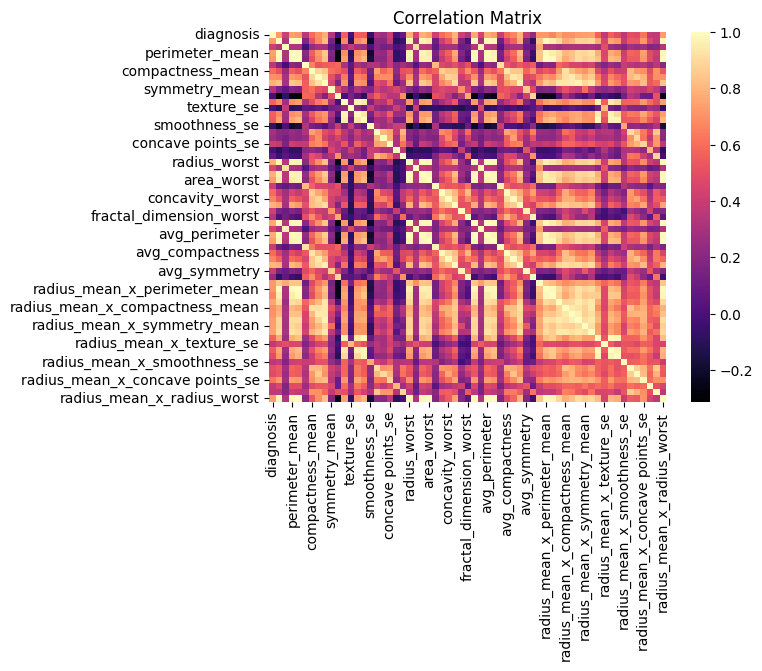

In [14]:
#.corr() will produce a correlation matrix!
corr_matrix = df.corr()

#since we have alot of features, we have to set a figure size
# plt.figure(figsize=(15, 15))

#to make the correlation matrix presetable, we will use seaborn power
sns.heatmap(corr_matrix, cmap='magma', annot=False)

plt.title('Correlation Matrix')
plt.show()

## **4. What is the correlation with the target?**

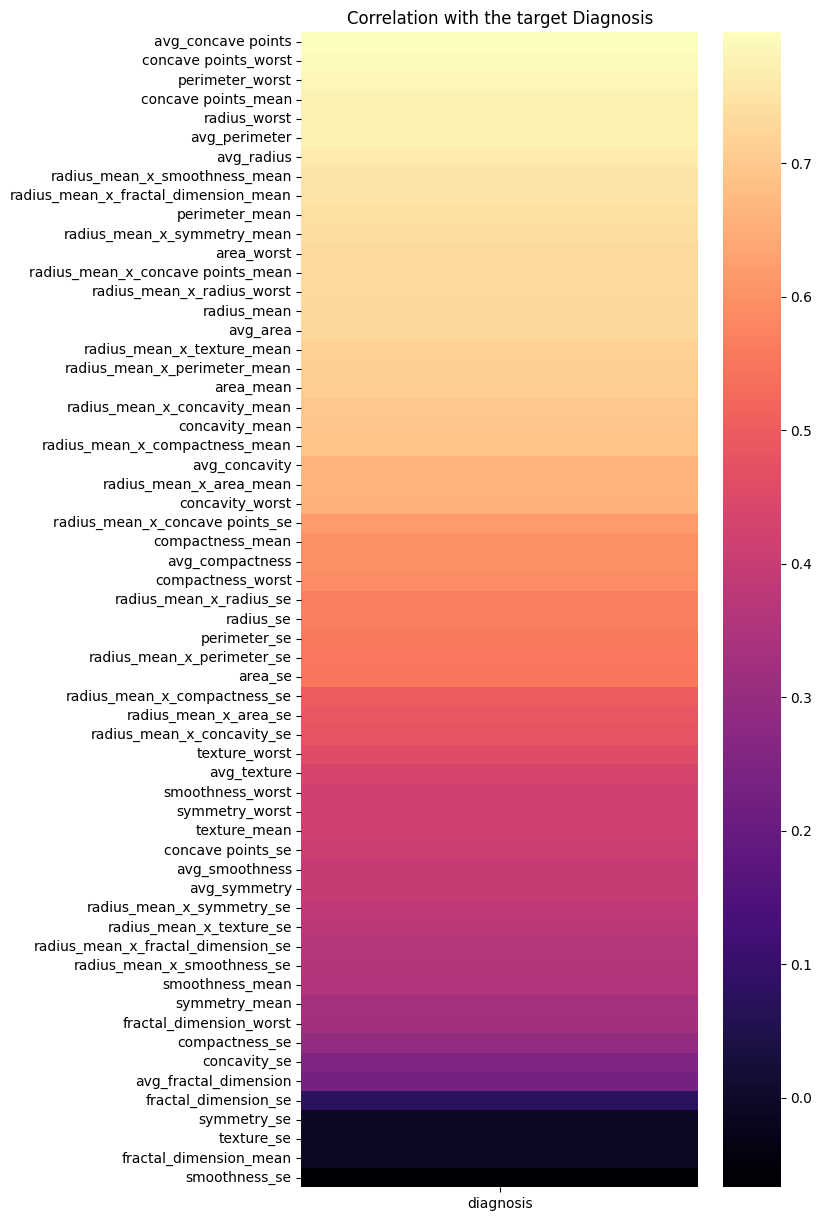

In [15]:
#getting the correlation matrix with the target
corr_matrix = corr_matrix['diagnosis'].drop('diagnosis')

#sort the values
corr_matrix = corr_matrix.sort_values(ascending=False)

#since we have alot of features, we have to set a figure size
plt.figure(figsize=(6.4, 15))

sns.heatmap(corr_matrix.to_frame(), cmap='magma', annot=False)

plt.title('Correlation with the target Diagnosis')
plt.show()

Comment: Looking at the first graph is not satisfying, but we can observe that many features here carry the same meaning, with correlation reaching 1 (this is alot)!

Regarding the second graph, we can observe that the feature engineered features have very strong correlation with the target which is a excellent!

What can we do?
- Use Principle Component Analysis (PCA): This will choose the best features for you.

Please note that there are many approches here, but whatever you choose must be implemented with cross-validated.

# **Modeling 🛠️**

What we will do here?
- We will build 3 different models, Decision tree, Random forest, XGBoost.
- Each model will be trained and evaluated before and after feature engineering.

Moreover, since many features have the same correlation with each other (scientifically, it is multicollinearity), firstly, I will find the best compination of features using PCA and compare the outcome with XGBoost feature importance. Just after that, we will start with the models training.

## **1. Splitting the data**

In [16]:
#we split the data into x and y.
#x is the independent features where y is the dependent one

x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

#creating training and testing splits, with the ratios 0.9 training and 0.1 testing
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    random_state=7, test_size=0.1)

## **2. Apply PCA**

In [17]:
#before moving further, you have to know that PCA relies on standardscaled values
#this is because when values have different scales, PCA will not give a meaningful
#output

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#apply PCA

#you might say, what is n_components parameter?
pca = PCA(n_components=0.95)

#n_components: if its a whole number, then this number is going to be the output
#number of features.

#n_components: if its a decimal number that is less than one, then its the variance.
#you can think of it as:
#"I want to keep 95% of the important stuff and throw away only the less useful stuff."

#the output is going to be numpy array
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


#what is the shape after performing PCA?
print('Number of records:', x_train_pca.shape[0],
      '\nNumber of columns:', x_train_pca.shape[1])

Number of records: 512 
Number of columns: 10


### **View the correlation after the PCA**

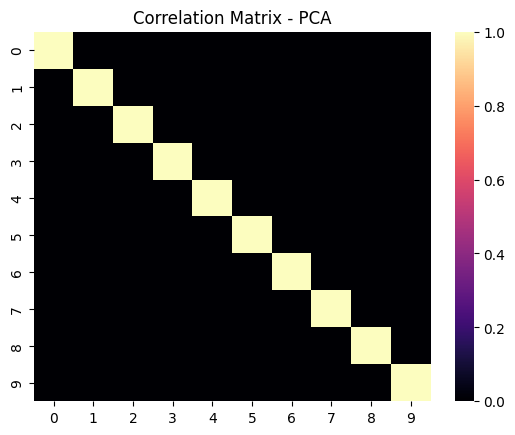

In [18]:
#create a dataframe with the x_pca numpy array
n_df = pd.DataFrame(x_train_pca)

corr_matrix = n_df.corr()

sns.heatmap(corr_matrix, cmap='magma', annot=False)

plt.title('Correlation Matrix - PCA')
plt.show()

Comment: We can see that now, we have a PERFECT correlation matrix, since the features does not intersect with each other, each feature has its own unique information for the model to extract!

Moreover, I observed that when you change the variance, the correlation matrix will remain the same with the same diagnal of color but with more features ( you can change the variance threshhold to 0.999 and you will end up with 30 features :O ).

Now what is the difference between 0.95, 0.99 and 0.999?

The more you increase the variance, the more features you will obtain from the original dataset. Is that a good thing? not necessarly a good or bad thing, you have to experiment.

Sometimes more features are good, this is true for complex datasets where even small amounts of variance can hold useful patterns. However, more features can introduce noise (redundant information), causing the model to overfit.

As a result of this, we are going to investigate here the difference between 0.95, 0.99, and 0.999 on the 3 models, Decision tree, Random Forest, and XGBoost!

## **3. PCA vs Tree-based models**

### **1. Decision tree**

In [19]:
pca = PCA(n_components=0.95)
x_train_pca95 = pca.fit_transform(x_train_scaled)
x_test_pca95 = pca.transform(x_test_scaled)

#define the hyper parameters to try them out on GridSearchCV
param_grid_DT = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

#my cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

#the following function is built to simplify code
def build_DT_model(parameters, cv, x_train_pca, x_test_pca):
    #create decision tree model
    model = DecisionTreeClassifier(random_state=7)
    
    #create grid search to find the best hyper parameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_DT,
                               cv=skf, scoring='accuracy', n_jobs=-1)
    
    #fit Grid Search
    grid_search.fit(x_train_pca, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    #testing the performance of the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_pca)

    #print classification report
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred))

#test number one, n_components=0.95:

#calling the function
build_DT_model(param_grid_DT, skf, x_train_pca95, x_test_pca95)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9374383671597294

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.90      0.86      0.88        21

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57



In [20]:
pca = PCA(n_components=0.99)
x_train_pca99 = pca.fit_transform(x_train_scaled)
x_test_pca99 = pca.transform(x_test_scaled)

#test number two, n_components=0.99:

build_DT_model(param_grid_DT, skf, x_train_pca99, x_test_pca99)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.939422084623323

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



In [21]:
pca = PCA(n_components=0.999)
x_train_pca999 = pca.fit_transform(x_train_scaled)
x_test_pca999 = pca.transform(x_test_scaled)

#test number two, n_components=0.999:

build_DT_model(param_grid_DT, skf, x_train_pca999, x_test_pca999)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.9393991514734549

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



### **2. Random Forest**

In [22]:
#define the hyper parameters to try them out on GridSearchCV
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5], 
}

#the following function is built to simplify code
def build_RF_model(parameters, cv, x_train_pca, x_test_pca):
    #create decision tree model
    model = RandomForestClassifier(random_state=7)
    
    #create grid search to find the best hyper parameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_DT,
                               cv=skf, scoring='accuracy', n_jobs=-1)
    
    #fit Grid Search
    grid_search.fit(x_train_pca, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    #testing the performance of the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_pca)

    #print classification report
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred))

#test number one, n_components=0.95:

#calling the function
build_RF_model(param_grid_RF, skf, x_train_pca95, x_test_pca95)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9491801398922141

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.90      0.90      0.90        21

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [23]:
#test number two, n_components=0.99:

build_RF_model(param_grid_RF, skf, x_train_pca99, x_test_pca99)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.9452929709895654

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.86      0.90      0.88        21

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [24]:
#test number two, n_components=0.999:

build_RF_model(param_grid_RF, skf, x_train_pca999, x_test_pca999)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9413599357871804

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.86      0.86      0.86        21

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



### **3. XGBoost**

In [25]:
param_grid_XGB = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_child_weight': [1, 5, 10, 20],
    'lambda': [0, 1, 2],
    'eta': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1]
}

#the following function is built to simplify code
def build_XGB_model(parameters, cv, x_train_pca, x_test_pca):
    #create decision tree model
    model = XGBClassifier(objective='binary:logistic', random_state=7)
    
    #create grid search to find the best hyper parameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_XGB,
                               cv=skf, scoring='accuracy', n_jobs=-1)
    
    #fit Grid Search
    grid_search.fit(x_train_pca, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    #testing the performance of the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_pca)

    #print classification report
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred))

#test number one, n_components=0.95:

build_XGB_model(param_grid_XGB, skf, x_train_pca95, x_test_pca95)

Best Parameters: {'colsample_bytree': 0.6, 'eta': 0.2, 'lambda': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300}
Best Score: 0.9687191835798646

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.90      0.90      0.90        21

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [26]:
#test number one, n_components=0.99:

build_XGB_model(param_grid_XGB, skf, x_train_pca99, x_test_pca99)

Best Parameters: {'colsample_bytree': 0.6, 'eta': 0.1, 'lambda': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300}
Best Score: 0.9589725948859075

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.86      0.90      0.88        21

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [27]:
#test number one, n_components=0.999:

build_XGB_model(param_grid_XGB, skf, x_train_pca999, x_test_pca999)

Best Parameters: {'colsample_bytree': 0.8, 'eta': 0.2, 'lambda': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Best Score: 0.957000343997248

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



# **Summary 📈**

Below you will find the summary of the above training:

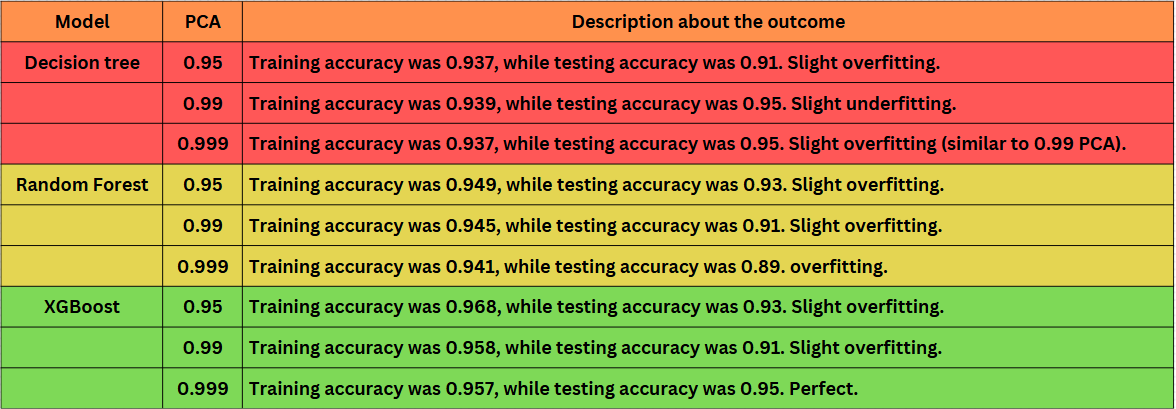

We can observe that RandomForest did bad when PCA increased, while the other models seems to do better.

What do I recommend to increase the accuracy even more?
- Data Collection: Belive the models can do better if more samples are collected.
- Hyper parameter tuning: Perhaps more tuning parameters could increase the performance.
- Sampling techniques: In this notebook, I did not apply any sampling techniques. Perhaps SMOTE can increase the accuracy.

# <span style="color: black; font-weight: bold; font-size: 100px;">THANKS 🙏</span>


<span style="color: black; font-weight: bold; font-size: 20px;">upvote please !</span>

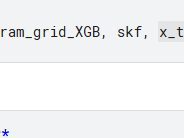